## **Data Loading**

In [1]:
FILE_PATH_TSLA = "../data/processed/tsla_data_with_daily_return.csv"

## importing lib
import pandas as pd
import os
import numpy as np
import sys

# Add the src directory to the Python path
sys.path.append(os.path.abspath("../src"))

In [2]:
import pandas as pd
from model_training import *

df = pd.read_csv(FILE_PATH_TSLA, parse_dates=['Date'], index_col='Date')
tsla_price = df['Close']

train_df, test_df = split_time_series_data(data=df, split_date='2023-12-31')

Data split on: 2023-12-31
Training set: 2015-07-08 to 2023-12-31 (3099 rows)
Testing set:  2024-01-01 to 2025-07-30 (577 rows)


In [3]:
# training the model
import warnings
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath("../src"))
model, _ = train_auto_arima_model(train_df['Close'], is_seasonal=True, seasonal_period=5);


--- Starting SARIMA Model Training ---
Finding optimal parameters with auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=17801.016, Time=3.03 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=17870.215, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=17846.892, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=17850.201, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=17869.139, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=17800.620, Time=1.79 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=17813.190, Time=0.96 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=17801.137, Time=2.83 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=17799.954, Time=1.68 sec
 ARIMA(2,1,2)(2,0,0)[5] intercept   : AIC=17801.065, Time=2.78 sec
 ARIMA(2,1,2)(2,0,1)[5] intercept   : AIC=17803.053, Time=3.50 sec
 ARIMA(1,1,2)(1,0,0)[5] intercept   : AIC=17835.301, Time=0.88 sec
 ARIMA(2,1,1)(1,0,0)[5] intercept   : AIC=17832.363, Time=1.43 sec



--- Generating Forecast for 577 periods ---
Forecast generation complete.


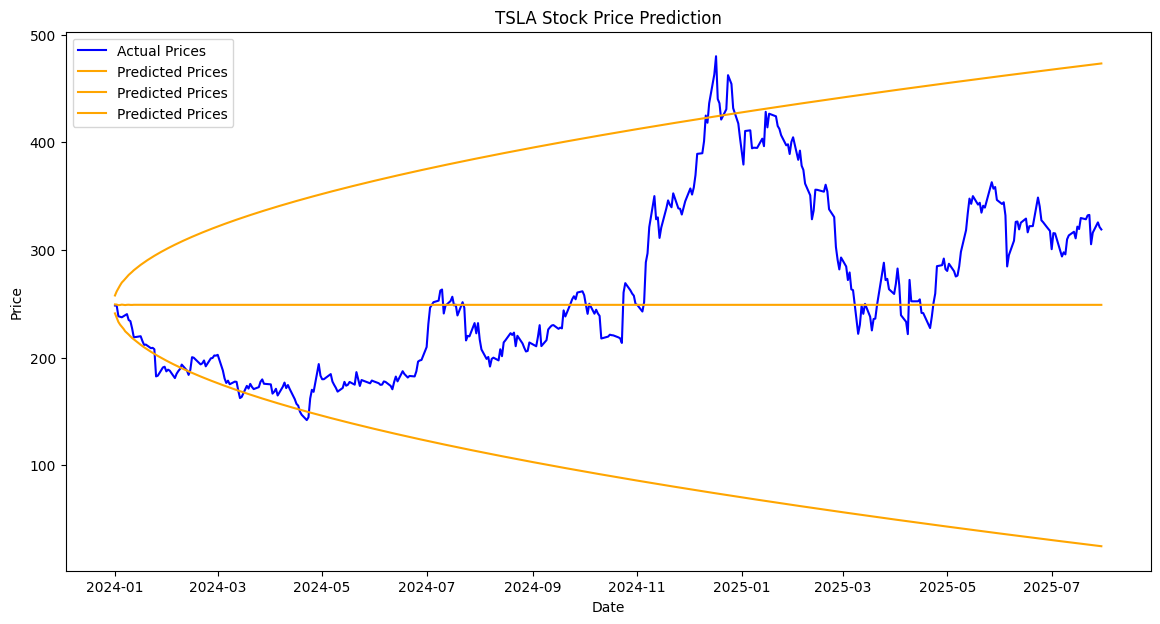

In [4]:
from prediction_models import generate_forecast
# predictions = generate_forecast(fitted_model, n_periods, forecast_index, alpha=0.05)
predictions = generate_forecast(model, len(test_df), test_df.index, alpha=0.05)

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['Close'], label='Actual Prices', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Prices', color='orange')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
